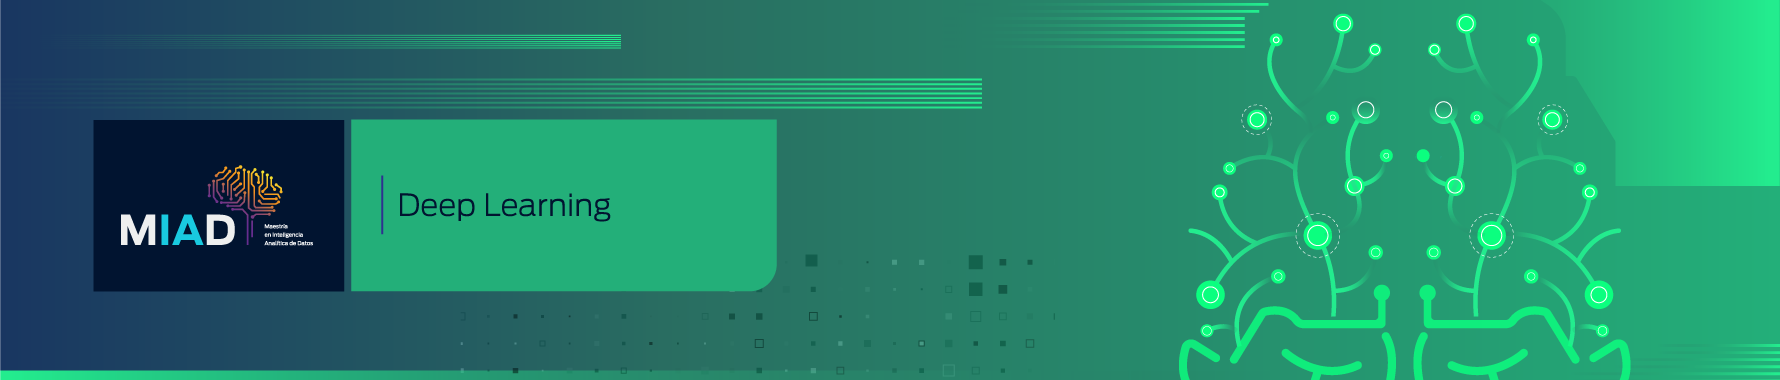

# Introducción al Deep Learning

## Video tutorial de keras

### Propósito

Por medio de este tutorial, se pretende hacer una introducción al uso de Keras y TensorFlow

### Instrucciones generales

1. Para seguir este tutorial solo siga las indicaciones asociadas a cada celda del notebook. Sin embargo, siéntase libre de modificar el archivo editando las celdas, lo que le permitirá afianzar su comprensión sobre las distintas funcionalidades de código.  

2. Recuerde que para esta actividad NO necesita realizar ningún tipo de entrega.

### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos de este notebook:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from tensorflow import keras
tf.__version__
keras.__version__

'2.10.0'

### Carga y separación de datos 

En primer lugar, cargamos los datos a usar en este notebook que corresponden a la popular base de datos MNIST, que contiene 70000 imágenes en escala de grises de 29x28 pixeles, cada uno con 10 clases. 

In [2]:
# Cargar los datos
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Revisar dimensiones de las variables
X_train_full.shape

(60000, 28, 28)

In [4]:
# Revisar tipo de variable de las variables
X_train_full.dtype

dtype('uint8')

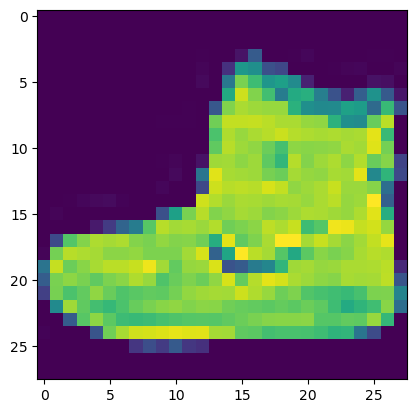

In [6]:
plt.imshow(X_train_full[0])

In [5]:
# Re escalar las variables 
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Modelo de red neuronal con el API secuencial

### Creación de la red

Para solucionar este problema de clasificación, emplearemos un modelo de red neuronal secuencial de tipo _feedforward_. Para ello, creamos el objeto y procedemos a añadir cada una de las capas, especificando el número de neuronas y la función de activación en cada caso.

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

### Visualización 
Podemos visualizar nuestra red con ayuda de funciones como _plot_model( )_ o _ann_viz_( ):

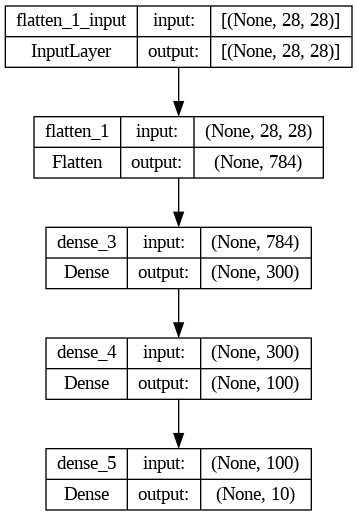

In [9]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

*Nota:* El término "None" aparece cuando no se ha definido el tamaño del *batch*, concepto que revisaremos en un laboratorio posterior. Por el momento, esto no implica ningún problema funcional ya que *Keras* establece un valor por defecto de 32.

In [10]:
# Generamos un resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers
model.layers[1].name

'dense_3'

In [16]:
weights, biases = model.layers[1].get_weights()
weights
weights.shape

(784, 300)

### Compilación del modelo 

Con la función [_compile( )_](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), configuramos nuestra red para entrenarla. Definimos entonces la [función de pérdida](https://www.tensorflow.org/api_docs/python/tf/keras/losses), el [optimizador](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) y las [métricas](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) a evaluar del modelo durante el entrenamiento y prueba. 

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

### Entrenamiento del modelo 
Entrenamos nuestra red neuronal con los datos de entrenamiento. Podemos evidenciar el valor de la función de pérdida y el accuracy del modelo para cada epoch.

In [19]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7067 - accuracy: 0.7668 - val_loss: 0.5128 - val_accuracy: 0.8230
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4909 - accuracy: 0.8297 - val_loss: 0.4374 - val_accuracy: 0.8520
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4448 - accuracy: 0.8446 - val_loss: 0.4186 - val_accuracy: 0.8556
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4183 - accuracy: 0.8533 - val_loss: 0.4094 - val_accuracy: 0.8572
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3976 - accuracy: 0.8602 - val_loss: 0.3864 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3820 - accuracy: 0.8660 - val_loss: 0.3773 - val_accuracy: 0.8668
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3680 - accuracy: 0.8712 - val_loss: 0.3715 - val_accuracy:

La anterior información también puede ser presentada gráficamente:

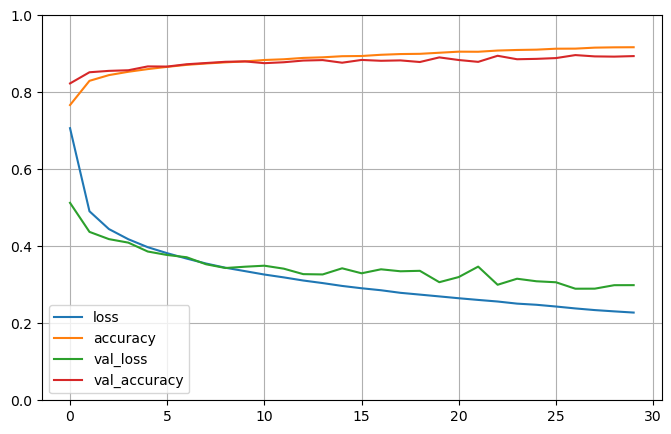

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Evaluación del modelo
Podemos evaluar nuestro modelo con ayuda de la función _evaluate( )_ que retorna la función de pérdida y la métrica seleccionada (el _accuracy_ en este caso) dados los datos de prueba:

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 70.7655 - accuracy: 0.8400


Finalmente, podemos hacer predicciones sobre los datos de test utilizando el modelo y a partir de ello calcular otras métricas relevantes:

In [22]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 78ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
y_pred =np.argmax(y_proba,axis=1)
y_pred
classes_y=np.argmax(y_proba,axis=1)
classes_y

array([9, 2, 1])